<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/adding_C4/C4/W3/ungraded_labs/C4_W3_Lab_1_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [3]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [4]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

8/8 [==============================] - 0s 8ms/step - loss: 6.9146 - mae: 7.3947 - lr: 2.8184e-06
Epoch 51/100
8/8 [==============================] - 0s 8ms/step - loss: 7.0549 - mae: 7.5381 - lr: 3.1623e-06
Epoch 52/100
8/8 [==============================] - 0s 7ms/step - loss: 7.4218 - mae: 7.9044 - lr: 3.5481e-06
Epoch 53/100
8/8 [==============================] - 0s 6ms/step - loss: 6.9011 - mae: 7.3845 - lr: 3.9811e-06
Epoch 54/100
8/8 [==============================] - 0s 7ms/step - loss: 6.7600 - mae: 7.2387 - lr: 4.4668e-06
Epoch 55/100
8/8 [==============================] - 0s 8ms/step - loss: 6.6569 - mae: 7.1356 - lr: 5.0119e-06
Epoch 56/100
8/8 [==============================] - 0s 8ms/step - loss: 6.1883 - mae: 6.6645 - lr: 5.6234e-06
Epoch 57/100
8/8 [==============================] - 0s 7ms/step - loss: 6.8607 - mae: 7.3406 - lr: 6.3096e-06
Epoch 58/100
8/8 [==============================] - 0s 6ms/step - loss: 7.6426 - mae: 8.1276 - lr: 7.0795e-06
Epoch 59/100
8/8 [=====

(1e-08, 0.0001, 0.0, 30.0)

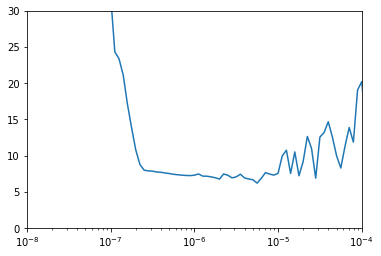

In [5]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=5e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=400)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

8/8 [==============================] - 0s 8ms/step - loss: 7.5730 - mae: 8.0597
Epoch 60/400
8/8 [==============================] - 0s 7ms/step - loss: 5.0690 - mae: 5.5475
Epoch 61/400
8/8 [==============================] - 0s 7ms/step - loss: 5.1376 - mae: 5.6194
Epoch 62/400
8/8 [==============================] - 0s 7ms/step - loss: 5.2027 - mae: 5.6836
Epoch 63/400
8/8 [==============================] - 0s 8ms/step - loss: 5.0844 - mae: 5.5659
Epoch 64/400
8/8 [==============================] - 0s 9ms/step - loss: 4.6034 - mae: 5.0818
Epoch 65/400
8/8 [==============================] - 0s 8ms/step - loss: 9.0663 - mae: 9.5548
Epoch 66/400
8/8 [==============================] - 0s 9ms/step - loss: 9.8765 - mae: 10.3636
Epoch 67/400
8/8 [==============================] - 0s 8ms/step - loss: 6.7593 - mae: 7.2429
Epoch 68/400
8/8 [==============================] - 0s 8ms/step - loss: 7.3643 - mae: 7.8504
Epoch 69/400
8/8 [==============================] - 0s 6ms/step - loss: 6.8576 - m

8/8 [==============================] - 0s 6ms/step - loss: 6.4905 - mae: 6.9764
Epoch 147/400
8/8 [==============================] - 0s 6ms/step - loss: 6.8364 - mae: 7.3228
Epoch 148/400
8/8 [==============================] - 0s 6ms/step - loss: 7.1399 - mae: 7.6285
Epoch 149/400
8/8 [==============================] - 0s 6ms/step - loss: 6.4077 - mae: 6.8910
Epoch 150/400
8/8 [==============================] - 0s 6ms/step - loss: 5.6566 - mae: 6.1389
Epoch 151/400
8/8 [==============================] - 0s 9ms/step - loss: 4.9329 - mae: 5.4155
Epoch 152/400
8/8 [==============================] - 0s 7ms/step - loss: 4.2948 - mae: 4.7709
Epoch 153/400
8/8 [==============================] - 0s 8ms/step - loss: 4.4252 - mae: 4.9032
Epoch 154/400
8/8 [==============================] - 0s 6ms/step - loss: 4.5978 - mae: 5.0762
Epoch 155/400
8/8 [==============================] - 0s 8ms/step - loss: 4.4737 - mae: 4.9498
Epoch 156/400
8/8 [==============================] - 0s 7ms/step - loss: 4

8/8 [==============================] - 0s 8ms/step - loss: 4.8978 - mae: 5.3783
Epoch 234/400
8/8 [==============================] - 0s 9ms/step - loss: 5.1642 - mae: 5.6489
Epoch 235/400
8/8 [==============================] - 0s 6ms/step - loss: 4.7770 - mae: 5.2563
Epoch 236/400
8/8 [==============================] - 0s 7ms/step - loss: 4.4715 - mae: 4.9493
Epoch 237/400
8/8 [==============================] - 0s 8ms/step - loss: 4.6331 - mae: 5.1075
Epoch 238/400
8/8 [==============================] - 0s 7ms/step - loss: 4.6551 - mae: 5.1351
Epoch 239/400
8/8 [==============================] - 0s 7ms/step - loss: 5.2060 - mae: 5.6853
Epoch 240/400
8/8 [==============================] - 0s 7ms/step - loss: 4.9109 - mae: 5.3889
Epoch 241/400
8/8 [==============================] - 0s 8ms/step - loss: 4.4561 - mae: 4.9306
Epoch 242/400
8/8 [==============================] - 0s 8ms/step - loss: 4.3059 - mae: 4.7794
Epoch 243/400
8/8 [==============================] - 0s 7ms/step - loss: 6

8/8 [==============================] - 0s 8ms/step - loss: 4.3430 - mae: 4.8180
Epoch 321/400
8/8 [==============================] - 0s 8ms/step - loss: 4.4423 - mae: 4.9199
Epoch 322/400
8/8 [==============================] - 0s 7ms/step - loss: 4.2612 - mae: 4.7347
Epoch 323/400
8/8 [==============================] - 0s 8ms/step - loss: 4.4291 - mae: 4.9071
Epoch 324/400
8/8 [==============================] - 0s 8ms/step - loss: 4.1170 - mae: 4.5888
Epoch 325/400
8/8 [==============================] - 0s 9ms/step - loss: 4.4699 - mae: 4.9460
Epoch 326/400
8/8 [==============================] - 0s 8ms/step - loss: 5.2074 - mae: 5.6906
Epoch 327/400
8/8 [==============================] - 0s 6ms/step - loss: 5.1979 - mae: 5.6799
Epoch 328/400
8/8 [==============================] - 0s 7ms/step - loss: 5.5484 - mae: 6.0307
Epoch 329/400
8/8 [==============================] - 0s 7ms/step - loss: 4.5915 - mae: 5.0721
Epoch 330/400
8/8 [==============================] - 0s 7ms/step - loss: 4

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


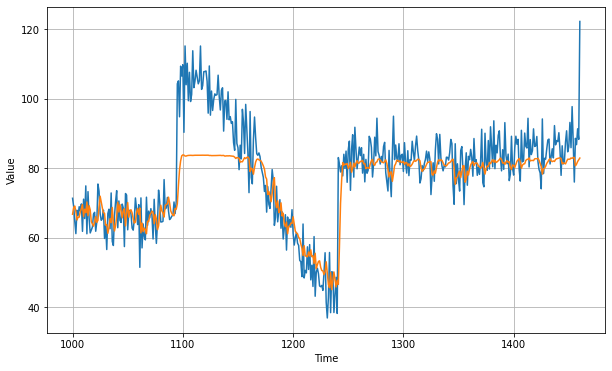

In [7]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [8]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

6.5121307

<Figure size 432x288 with 0 Axes>

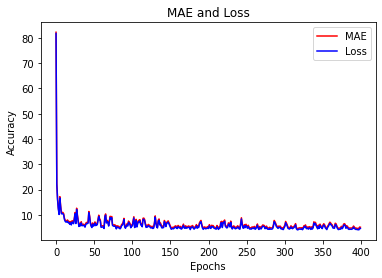

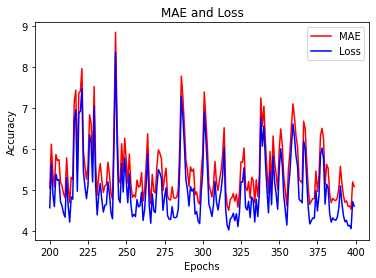

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()